## Instalação dos pacotes necessários

In [223]:
!pip install rapidfuzz
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Importação dos pacotes a serem utilizados para comparação

In [2]:
import csv
import os
from rapidfuzz import fuzz
from rapidfuzz.process import extract

## Definição de 

In [3]:
def read_csv(csv_path, delimiter_char):
    with open(csv_path, mode='r',encoding='utf-8-sig') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=delimiter_char)
        line_count = 0
        wanted_columns = []
        for row in csv_reader:

            if line_count == 0:
                columns_names = delimiter_char.join(row).split(delimiter_char)
                line_count += 1

            data={}
            for column_name in columns_names: 
                data[column_name]=row[column_name]
            wanted_columns.append(data)
            line_count += 1

        return wanted_columns

In [501]:
product_search_name = "bala halls"
search_accuracy = 60
search_result_limit = 5

In [502]:
paths = [os.path.abspath(os.path.join('searched_csvs', p)) for p in os.listdir('searched_csvs')]
array_complete = []
array_matches = []
array_results = []

for path in paths:
    csv_name= path.split('/')[-1]
    secondary_comparer=read_csv(path,';')

    result_match=None
    score1 = extract(product_search_name, [d['ProductName'] for d in secondary_comparer], scorer=fuzz.QRatio,limit=search_result_limit, score_cutoff=search_accuracy)
    
    if score1:
        array_inside=[]
        for score in score1:
            product_name = score[0]
            brand=secondary_comparer[score[2]]['Brand']
            match_score =round(score[1],2)

            obj_original={'Product_Name': product_name,'Brand':brand,'Match_Score':match_score}
            array_inside.append(obj_original)

            obj_result = dict(obj_original)
            obj_result["Searched_CSV"]=csv_name
            array_results.append(obj_result)

        result_match=array_inside
        obj_matches={'Searched_CSV':csv_name,'Match_Result':len(result_match)}
        array_matches.append(obj_matches)

    obj_result={'Searched_CSV':path.split('/')[-1],'Match_Result':result_match}
    array_complete.append(obj_result)

In [503]:
print(f'Result of Fuzzy String Match of {product_search_name}:')
array_complete

Result of Fuzzy String Match of bala halls:


[{'Searched_CSV': 'CASA_CONSTRUCAO_E_JARDINAGEM.csv', 'Match_Result': None},
 {'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv',
  'Match_Result': [{'Product_Name': 'BALA RECHEADA',
    'Brand': 'PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A',
    'Match_Score': 60.87}]},
 {'Searched_CSV': 'MERCADOS_EMPORIOS_E_PADARIAS.csv', 'Match_Result': None},
 {'Searched_CSV': 'ROUPAS_CALCADOS_E_ACESSORIOS.csv', 'Match_Result': None},
 {'Searched_CSV': 'COMERCIO_VAREJISTA_OU_ESPECIALIZADO.csv',
  'Match_Result': None},
 {'Searched_CSV': 'OFICINAS_MECANICAS_E_TECNICAS.csv', 'Match_Result': None},
 {'Searched_CSV': 'VETERINARIAS_E_PET_SHOPS.csv', 'Match_Result': None},
 {'Searched_CSV': 'INFORMATICA_GAMES_E_ELETRONICOS.csv', 'Match_Result': None},
 {'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv',
  'Match_Result': [{'Product_Name': 'BALA HALLS MENTA',
    'Brand': 'MONDELEZ',
    'Match_Score': 76.92},
   {'Product_Name': 'BALA HALLS CEREJA',
    'Brand': 'MONDELEZ',
    'Match_Score': 74.07},
   {'Produ

In [504]:
print('Number of matches per CSV with Match_Result different than None:')
array_matches

Number of matches per CSV with Match_Result different than None:


[{'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv', 'Match_Result': 1},
 {'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv', 'Match_Result': 5}]

In [505]:
print('Final Array with Product_Name, Brand, Match_Score and Searched_CSV:')
array_results

Final Array with Product_Name, Brand, Match_Score and Searched_CSV:


[{'Product_Name': 'BALA RECHEADA',
  'Brand': 'PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A',
  'Match_Score': 60.87,
  'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv'},
 {'Product_Name': 'BALA HALLS MENTA',
  'Brand': 'MONDELEZ',
  'Match_Score': 76.92,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS CEREJA',
  'Brand': 'MONDELEZ',
  'Match_Score': 74.07,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS MENTA 28G',
  'Brand': 'MONDELEZ',
  'Match_Score': 66.67,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'HALLS',
  'Brand': '',
  'Match_Score': 66.67,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS CEREJA 28G',
  'Brand': 'MONDELEZ',
  'Match_Score': 64.52,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'}]

In [506]:
import pandas as pd
import matplotlib.pyplot as plt

In [507]:
df_match = pd.DataFrame.from_records(array_matches)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Searched_CSV  2 non-null      object
 1   Match_Result  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [508]:
df_result = pd.DataFrame.from_records(array_results)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  6 non-null      object 
 1   Brand         6 non-null      object 
 2   Match_Score   6 non-null      float64
 3   Searched_CSV  6 non-null      object 
dtypes: float64(1), object(3)
memory usage: 320.0+ bytes


In [509]:
df_result.head()

,Product_Name,Brand,Match_Score,Searched_CSV
0,BALA RECHEADA,PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A,60.87,DADOS_ABERTOS_ALIMENTO.csv
1,BALA HALLS MENTA,MONDELEZ,76.92,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
2,BALA HALLS CEREJA,MONDELEZ,74.07,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
3,BALA HALLS MENTA 28G,MONDELEZ,66.67,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
4,HALLS,,66.67,BANCAS_QUIOSQUES_E_PAPELARIAS.csv


In [510]:
df_match.head()

,Searched_CSV,Match_Result
0,DADOS_ABERTOS_ALIMENTO.csv,1
1,BANCAS_QUIOSQUES_E_PAPELARIAS.csv,5


In [511]:
import seaborn as sns


In [512]:
df_result.describe()

,Match_Score
count,6.000000
mean,68.286667
std,6.039923
min,60.870000
25%,65.057500
50%,66.670000
75%,72.220000
max,76.920000


In [513]:
df_result.columns

Index(['Product_Name', 'Brand', 'Match_Score', 'Searched_CSV'], dtype='object')

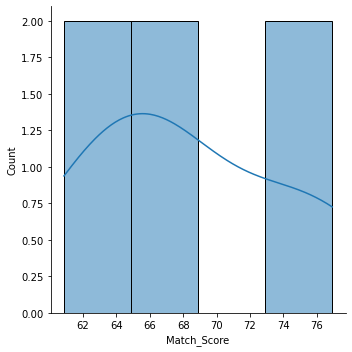

In [514]:
sns.displot(df_result['Match_Score'],kde=True)

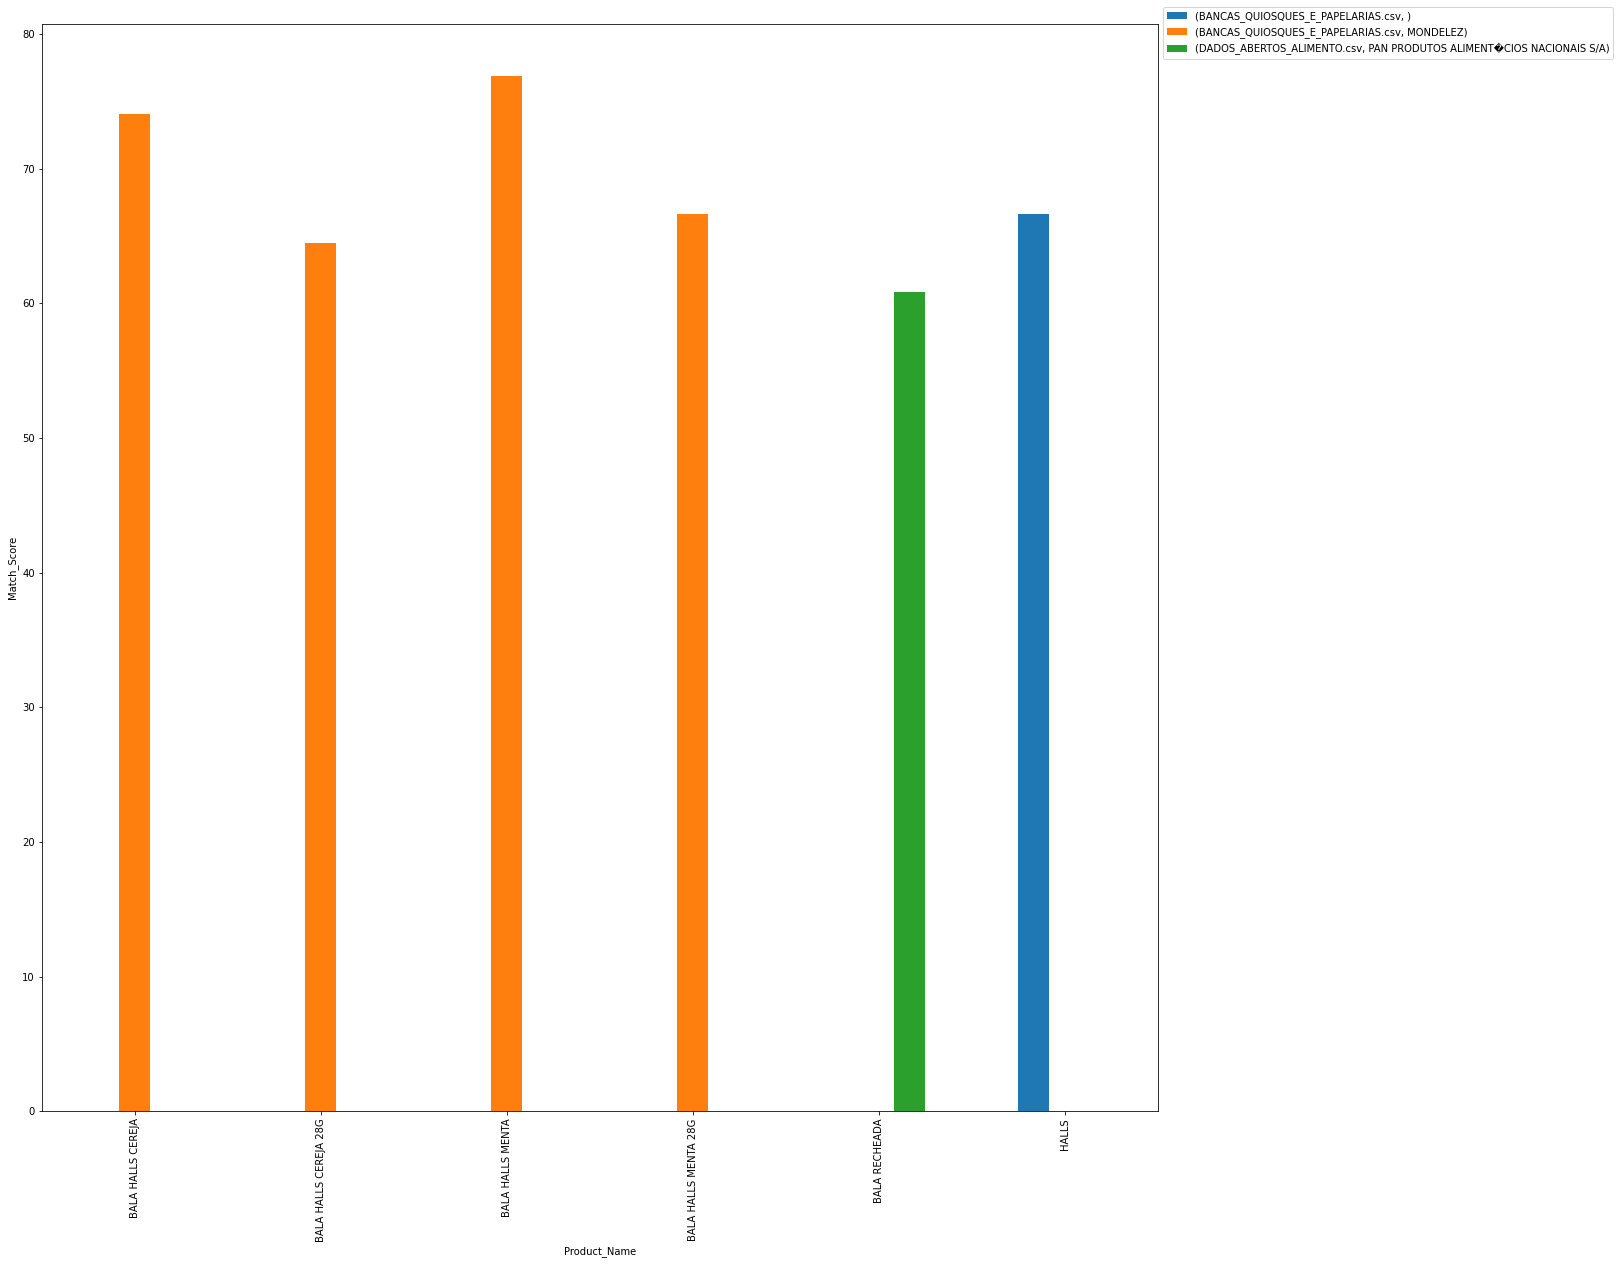

In [515]:
dfp = df_result.pivot_table(index='Product_Name', columns=['Searched_CSV','Brand'], values='Match_Score',fill_value=0)

ax = dfp.plot.bar(figsize=(20,20),align= "center")
ax.set_ylabel("Match_Score")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

array([[<AxesSubplot:title={'center':'(BANCAS_QUIOSQUES_E_PAPELARIAS.csv, )'}, xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:title={'center':'(BANCAS_QUIOSQUES_E_PAPELARIAS.csv, MONDELEZ)'}, xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot:title={'center':'(DADOS_ABERTOS_ALIMENTO.csv, PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A)'}, xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot:xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot:xlabel='Product_Name', 

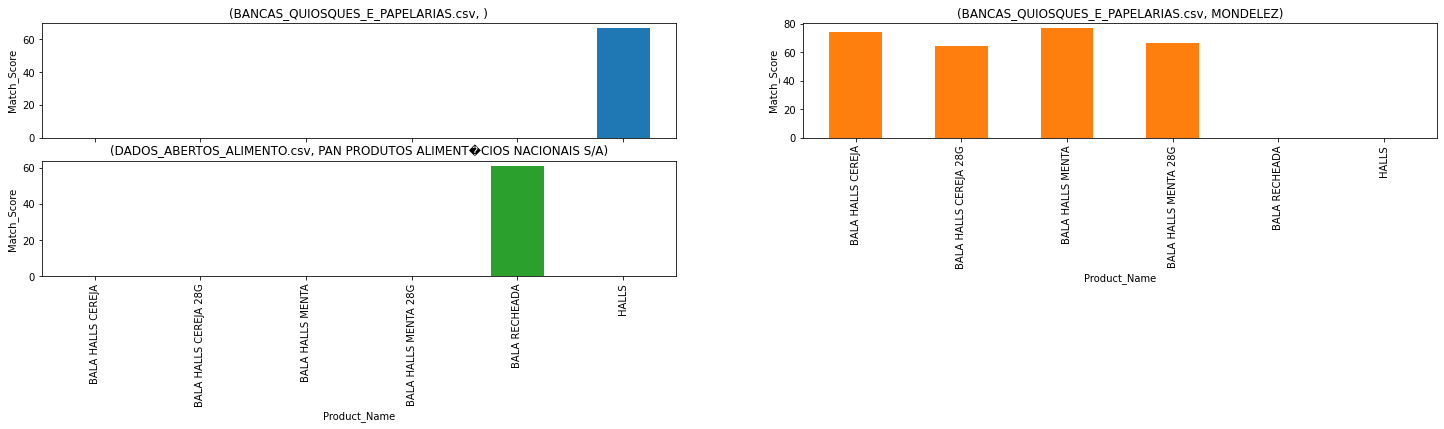

In [516]:
dfp.plot(kind='bar', subplots=True, figsize=(25, 25),layout=(10,2),legend=False,ylabel='Match_Score')

In [517]:
import numpy as np

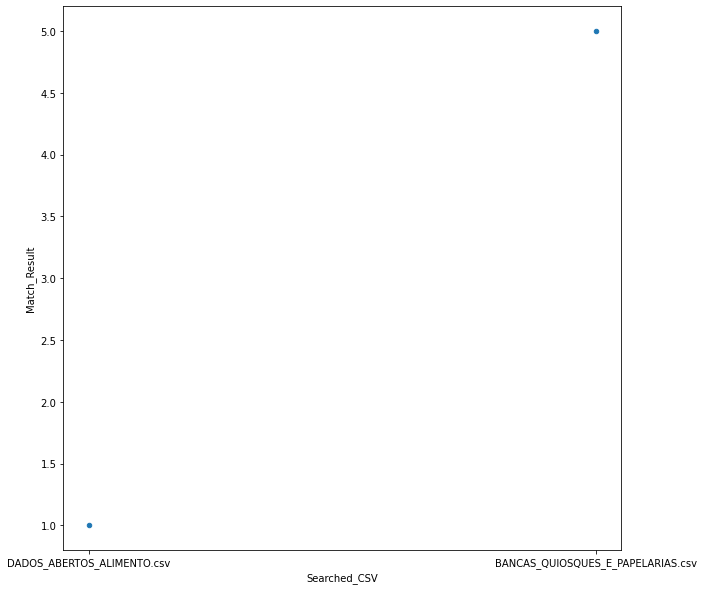

In [518]:
df_match.plot.scatter(x="Searched_CSV", y="Match_Result",figsize=(10, 10), alpha=1,colormap='viridis')
plt.show()

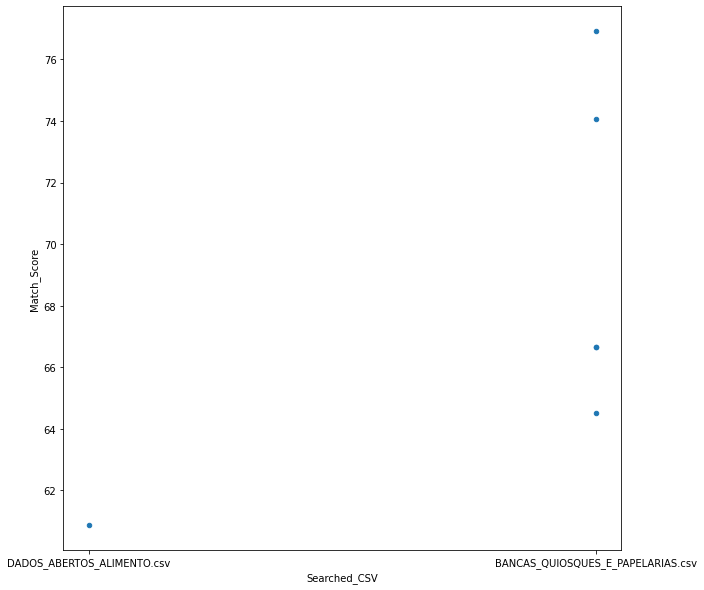

In [519]:
df_result.plot.scatter(x="Searched_CSV", y="Match_Score",figsize=(10, 10), alpha=1,colormap='viridis')
plt.show()